## Лабораторная работа № 1
### Тема: Предобработка изображений 


1.	Установите библиотеку OpenCV для Python

In [3]:
%pip install opencv-python numpy matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: C:\Users\vladk\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


2.	Используя возможности библиотеки Image Processing in OpenCV — OpenCV-Python Tutorials beta documentation (opencv24-python-tutorials.readthedocs.io), разработайте приложение, выводящее: 

    	заданное изображение;

    	изображение в оттенках серого (одноканальное);

    	бинарное изображение (черно-белое), полученное при помощи функции пороговой бинаризации threshold();

    	бинарное изображение, полученное при помощи функции адаптивной бинаризации adaptiveThreshold().

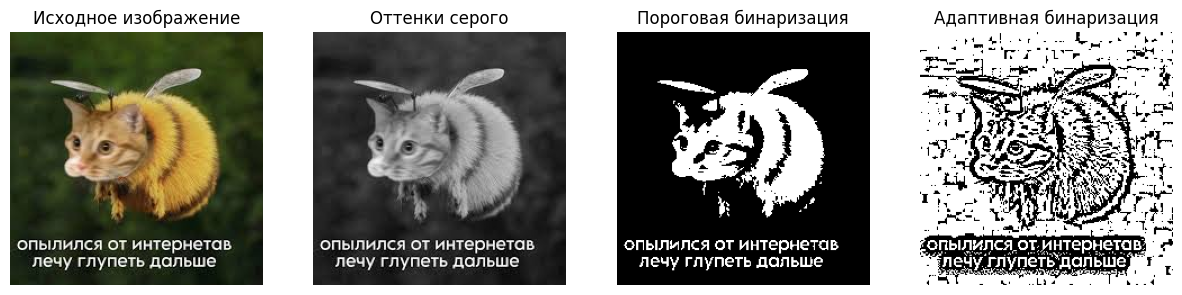

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(images, titles):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if i == 0:  # Исходное изображение в цвете
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        else:  # Оттенки серого и бинарные изображения
            plt.imshow(img, cmap='gray')
        plt.title(title)
        plt.axis('off')
    plt.show()

# Загрузка изображения (замените 'image.jpg' на путь к вашему изображению)
image = cv2.imread('image.jpg')

# Проверка, что изображение загружено
if image is None:
    print("Ошибка: изображение не найдено. Укажите правильный путь к файлу.")
else:
    # Преобразование в оттенки серого
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Пороговая бинаризация
    _, binary_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY)

    # Адаптивная бинаризация
    adaptive_binary = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                          cv2.THRESH_BINARY, 11, 2)

    # Список изображений и их заголовков для отображения
    images = [image, gray_image, binary_image, adaptive_binary]
    titles = ['Исходное изображение', 'Оттенки серого', 'Пороговая бинаризация', 'Адаптивная бинаризация']

    # Отображение всех изображений
    display_images(images, titles)

3.	Найдите или сделайте сами сильно затемненное изображение. Постройте его гистограмму. Выровняйте освещенность изображения при помощи функции equalizeHist(). Постройте гистограмму выровненного изображения для сравнения с начальной.

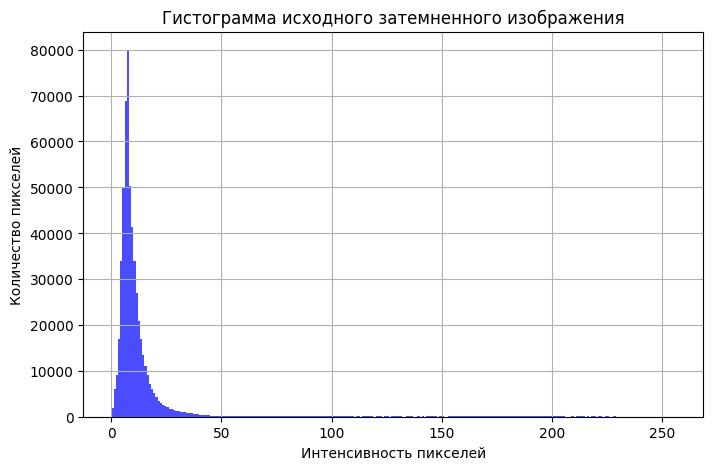

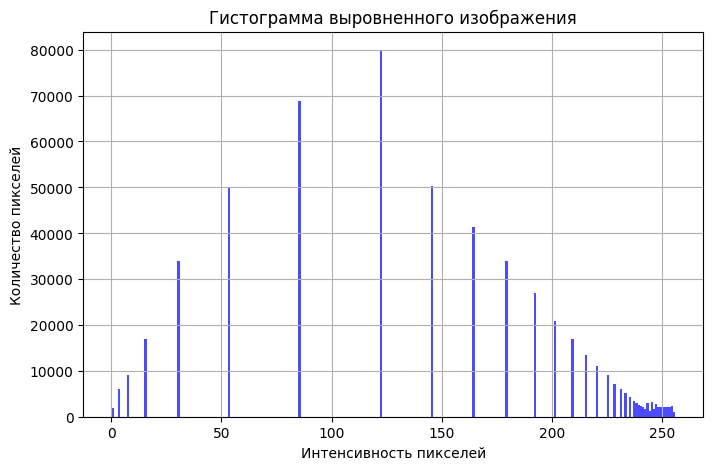

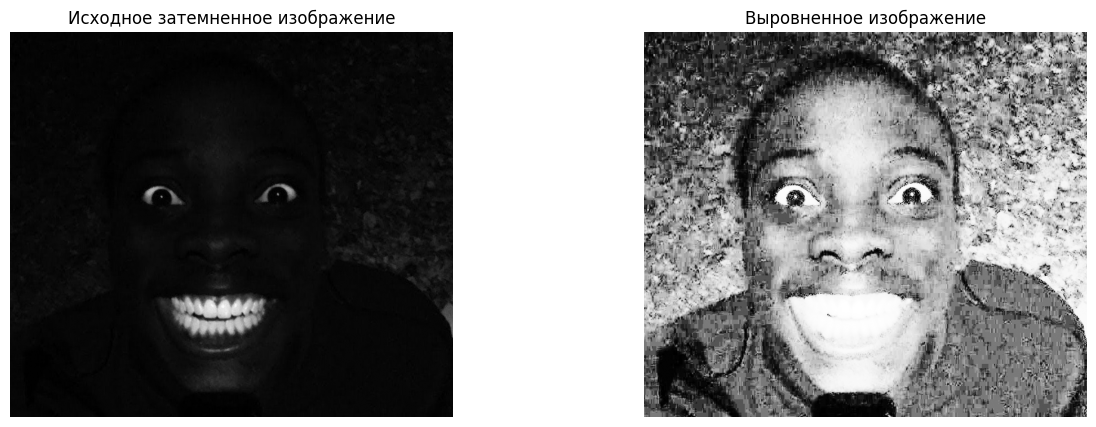

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для построения и отображения гистограммы
def plot_histogram(image, title):
    plt.figure(figsize=(8, 5))
    plt.hist(image.ravel(), bins=256, range=[0, 256], color='blue', alpha=0.7)
    plt.title(title)
    plt.xlabel('Интенсивность пикселей')
    plt.ylabel('Количество пикселей')
    plt.grid(True)
    plt.show()

# Функция для отображения изображений
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.show()

dark_image = cv2.imread('dark.jpg', cv2.IMREAD_GRAYSCALE)

# Проверка, что изображение создано или загружено
if dark_image is None:
    print("Ошибка: изображение не найдено или не создано.")
else:
    # Построение гистограммы исходного затемненного изображения
    plot_histogram(dark_image, 'Гистограмма исходного затемненного изображения')

    # Выравнивание освещенности
    equalized_image = cv2.equalizeHist(dark_image)

    # Построение гистограммы выровненного изображения
    plot_histogram(equalized_image, 'Гистограмма выровненного изображения')

    # Отображение изображений
    images = [dark_image, equalized_image]
    titles = ['Исходное затемненное изображение', 'Выровненное изображение']
    display_images(images, titles, cmap='gray')

4.	Найдите изображение плохого качества с шумами и выполните фильтрацию функциями blur(), GaussianBlur() и medianBlur().

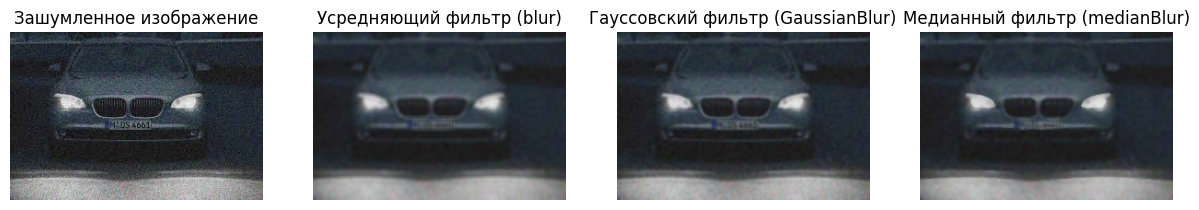

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if cmap:
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

noisy_image = cv2.imread('noise2.jpg')

# Проверка, что изображение создано или загружено
if noisy_image is None:
    print("Ошибка: изображение не найдено или не создано.")
else:
    # Применение фильтров
    blur_image = cv2.blur(noisy_image, (5, 5))  # Усредняющий фильтр
    gaussian_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)  # Гауссовский фильтр
    median_image = cv2.medianBlur(noisy_image, 5)  # Медианный фильтр

    # Список изображений и их заголовков для отображения
    images = [noisy_image, blur_image, gaussian_image, median_image]
    titles = ['Зашумленное изображение', 'Усредняющий фильтр (blur)', 
              'Гауссовский фильтр (GaussianBlur)', 'Медианный фильтр (medianBlur)']

    # Отображение всех изображений
    display_images(images, titles)

5.	В качестве исходного изображения возьмите изображение предметов на светлом однородном фоне. Преобразуйте его в бинарное изображение и примените с нему операции эрозии erode() и дилатации dilate().

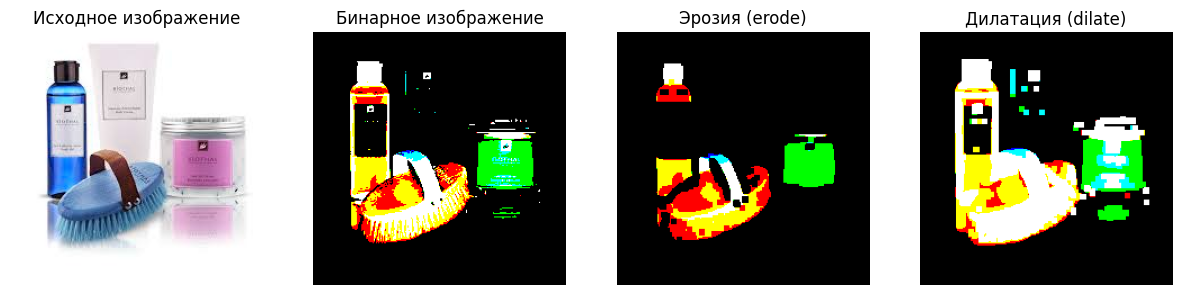

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Функция для отображения изображений
def display_images(images, titles, cmap=None):
    plt.figure(figsize=(15, 10))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i+1)
        if cmap:
            plt.imshow(img, cmap=cmap)
        else:
            plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.title(title)
        plt.axis('off')
    plt.show()

image = cv2.imread('white.jpg')

# Проверка, что изображение создано или загружено
if image is None:
    print("Ошибка: изображение не найдено или не создано.")
else:
    # Преобразование в бинарное изображение
    _, binary_image = cv2.threshold(image, 150, 255, cv2.THRESH_BINARY_INV)

    # Создание ядра для морфологических операций
    kernel = np.ones((5, 5), np.uint8)

    # Применение эрозии
    eroded_image = cv2.erode(binary_image, kernel, iterations=1)

    # Применение дилатации
    dilated_image = cv2.dilate(binary_image, kernel, iterations=1)

    # Список изображений и их заголовков для отображения
    images = [image, binary_image, eroded_image, dilated_image]
    titles = ['Исходное изображение', 'Бинарное изображение', 
              'Эрозия (erode)', 'Дилатация (dilate)']

    # Отображение всех изображений
    display_images(images, titles, cmap='gray')

1. Какой класс отвечает за работу с изображением?
В OpenCV для Python работа с изображениями осуществляется через массивы NumPy (numpy.ndarray), а не через отдельный класс. Изображение представлено как многомерный массив, где каждый элемент — значение пикселя. Основные функции для работы с изображениями находятся в модуле cv2.

2. Какая функция конвертирует изображение в различные цветовые пространства?
Функция cv2.cvtColor(). Она преобразует изображение из одного цветового пространства в другое, например, из BGR в RGB, HSV, LAB или оттенки серого. Пример: cv2.cvtColor(image, cv2.COLOR_BGR2GRAY).

3. Что означает параметр thresh в функции бинаризации изображения?
Параметр thresh в функции cv2.threshold() задаёт пороговое значение интенсивности пикселей. Пиксели с интенсивностью выше (или ниже, в зависимости от типа порога) thresh присваиваются одно значение (обычно 255), а остальные — другое (обычно 0). Например, в cv2.THRESH_BINARY пиксели ≥ thresh становятся 255, а < thresh — 0.

4. Как работает адаптивная бинаризация?
Адаптивная бинаризация (cv2.adaptiveThreshold()) вычисляет порог для каждого пикселя на основе локальной области вокруг него (размер задаётся параметром blockSize). Это позволяет лучше выделять объекты на изображениях с неоднородным освещением. Используются методы, такие как ADAPTIVE_THRESH_MEAN_C (среднее значение в области) или ADAPTIVE_THRESH_GAUSSIAN_C (взвешенное среднее с гауссовым ядром).

5. Что такое гистограмма изображения и что можно сказать об изображении по его гистограмме?
Гистограмма изображения — это график, показывающий распределение интенсивностей пикселей (от 0 до 255 для 8-битного изображения). По гистограмме можно определить:

Контрастность: узкая гистограмма указывает на низкий контраст, широкая — на высокий.
Яркость: смещение пиков вправо — светлое изображение, влево — тёмное.
Тип шума: резкие пики могут указывать на "соль-и-перец" шум.
Наличие объектов: несколько пиков могут указывать на разные объекты или области.


6. Какими методами можно выровнять освещенность изображения?

cv2.equalizeHist(): Выравнивание гистограммы для одноканального изображения (увеличивает контраст).
Адаптивное выравнивание гистограммы (cv2.createCLAHE()): Ограничивает усиление контраста в локальных областях, предотвращая переусиление шума.
Коррекция гаммы: Изменение яркости с помощью нелинейного преобразования (реализуется вручную или с cv2.LUT).
Нормализация яркости: Масштабирование значений пикселей к заданному диапазону (например, с cv2.normalize()).


7. Принцип работы матричных фильтров. Что такое свёртка изображения?
Матричные фильтры применяют ядро (маленькую матрицу) к каждому пикселю изображения, вычисляя новое значение как взвешенную сумму соседних пикселей. Свёртка изображения — это процесс применения ядра: ядро "скользит" по изображению, умножая значения пикселей на коэффициенты ядра и суммируя результат. Пример: усредняющий фильтр (cv2.blur()) использует ядро, где все элементы равны, для сглаживания. Свёртка используется для размытия, выделения краёв, повышения резкости и т.д.
Принцип работы медианного фильтра. Чем результат работы медианного фильтра отличается от результата работы фильтра Гаусса?

8. Медианный фильтр (cv2.medianBlur()): Для каждого пикселя берётся локальная область (например, 5x5), значения пикселей сортируются, и центральный пиксель заменяется медианой. Эффективен против "соль-и-перец" шума, сохраняет края объектов.
Фильтр Гаусса (cv2.GaussianBlur()): Применяет свёртку с гауссовым ядром, где пиксели взвешиваются по гауссову распределению. Сглаживает изображение, но может размывать края.
Различия: Медианный фильтр лучше удаляет импульсный шум и сохраняет края, тогда как гауссовский фильтр создаёт более плавное размытие, но может сгладить важные детали.


9. Назовите морфологические преобразования изображения?
Основные морфологические операции в OpenCV:

Эрозия (cv2.erode()): Уменьшает белые области в бинарном изображении.
Дилатация (cv2.dilate()): Увеличивает белые области.
Открытие (cv2.morphologyEx(), MORPH_OPEN): Эрозия, затем дилатация — удаляет мелкие белые шумы.
Закрытие (cv2.morphologyEx(), MORPH_CLOSE): Дилатация, затем эрозия — заполняет мелкие чёрные дыры.
Морфологический градиент (MORPH_GRADIENT): Разница между дилатацией и эрозией — выделяет края.
Top Hat (MORPH_TOPHAT): Выделяет мелкие яркие объекты.
Black Hat (MORPH_BLACKHAT): Выделяет мелкие тёмные области.


10. Какой эффект наблюдается в результате применения морфологических операций к бинарному изображению?


Эрозия: Уменьшает размер белых объектов, удаляет мелкие шумы и тонкие линии, разрывает слабосвязанные области.
Дилатация: Увеличивает размер белых объектов, заполняет мелкие дыры, соединяет близкие области.
Открытие: Удаляет мелкие белые шумы, сохраняя основные объекты.
Закрытие: Заполняет мелкие чёрные дыры внутри объектов, сохраняя их форму.
Эффекты зависят от размера и формы ядра, а также количества итераций.


11. В каких ситуациях имеет смысл применять операции замыкания и размыкания?


Открытие (размыкание): Используется для удаления мелких белых шумов или артефактов на бинарном изображении, сохраняя крупные объекты. Пример: удаление точечного шума после бинаризации.
Закрытие (замыкание): Применяется для заполнения мелких чёрных дыр или разрывов внутри объектов, сохраняя их общую форму. Пример: соединение разорванных контуров или заполнение пробелов в объектах после сегментации.